Name: Naitik Mittal

Registration Number: RA2111029010067

# Hotel Bar Inventory Optimization System


**1️⃣ Business Context & Problem Understanding**

A growing hotel chain operates multiple bars across different locations.

Current issues:

    Frequent stockouts of popular items
    Overstocking of slow-moving inventory
    Increased operational costs
    Reduced customer satisfaction



Objective: Develop an automated system to:

    ✅ Forecast item-level demand per bar
    ✅ Recommend inventory par levels (target stock levels)
    ✅ Simulate inventory performance (shortages, waste)
    ✅ Provide actionable reports to managers

**2️⃣ Data Loading & Cleaning**

Steps:

    Load historical inventory movement data (CSV)
    Parse Date Time Served to extract Date
    Clean numeric columns (Opening Balance, Purchase, Consumed, Closing Balance)
    Calculate missing consumption values:
    Consumed = Opening Balance + Purchase - Closing Balance
    Filter out invalid or negative consumption records
    Extract lists of Bar Name, Alcohol Type, Brand Name for UI dropdowns

**3️⃣ Exploratory Data Analysis (EDA)**

Purpose:

    Help managers understand patterns before forecasting.
    Visualizations generated:
    Total Consumption by Alcohol Type
    Top 20 Brands by volume consumed
    Total Consumption by Bar Location
    Helps identify which items and bars drive the most volume.

**4️⃣ Forecasting Demand with Prophet**

Method:

    Prophet time series model used (supports missing dates, handles weekly seasonality)
    Daily data prepared for each (Bar, Alcohol Type, Brand)
    Forecast horizon: default 7 days
    Config:
     No daily seasonality
     Weekly seasonality = True
     Changepoint prior scale = 0.1
    Output:
     Forecast curve
     Confidence intervals
    Helps managers see expected upcoming demand

**5️⃣ Inventory Recommendation Logic**

    For each (Bar, Alcohol Type, Brand):
    Calculate Average Daily Consumption
    Calculate Safety Stock:
     Z * Std Dev * sqrt(Lead Time) (Z = 1.645 for 95% service level)
    Calculate Reorder Point:
     Avg Daily * Lead Time + Safety Stock
    Calculate Par Level:
     Reorder Point * 1.5
    Calculate Days of Supply:
     Current Inventory / Avg Daily

    Purpose: Give bar managers clear guidance when to reorder.

**6️⃣ Inventory Simulation (30-Day Horizon)**

    Simulation Process:
     Simulate 30 days of consumption for each bar

    For each day:

     Randomize consumption per product (based on historical mean ± 30%)
     Check if inventory falls below 50% of Par Level → reorder
     Track shortage days and waste days (overstock > 120% of Par Level)

    Summary Output:
     Days with shortages
     Days with overstock (potential waste)

    Purpose: Help managers fine-tune Par Levels and safety stock to optimize inventory.

**7️⃣ Downloadable Inventory Report**

    Report generated per bar
    CSV file with:
     Bar Name
     Alcohol Type
     Brand Name
     Average Daily Consumption
     Safety Stock
     Reorder Point
     Par Level
     Current Inventory
     Days of Supply

    UI button: "Download Bar Report"

    Purpose: Give managers offline, shareable inventory recommendations.

**System Features**

    ✅ Data Loading & Cleaning
    ✅ EDA (visuals)
    ✅ Forecasting (Prophet)
    ✅ Inventory Recommendation (Par Level calculation)
    ✅ Inventory Simulation (shortage & waste)
    ✅ Per-bar CSV Report
    ✅ Interactive UI (Dropdowns & Buttons) — Colab compatible
    

**Conclusion**

    This system addresses the business need for better inventory management across the hotel chain’s bar operations.

**Benefits to business:**

    Fewer stockouts → Higher guest satisfaction
    Less waste → Lower operational cost
    Managers have forecast and inventory recommendations in one tool
    Simple to use — runs in Google Colab — easy for non-technical staff

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.0 MB/s eta 0:00:00
Please upload your dataset CSV:


Saving Consumption Dataset - Dataset.csv to Consumption Dataset - Dataset.csv

✅ Data loaded successfully!

=== EDA ===


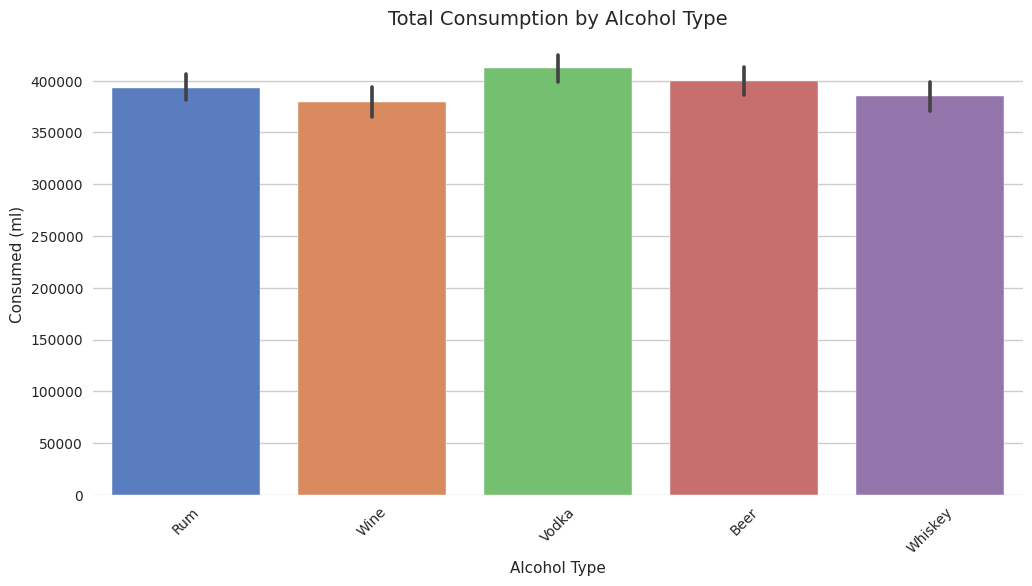

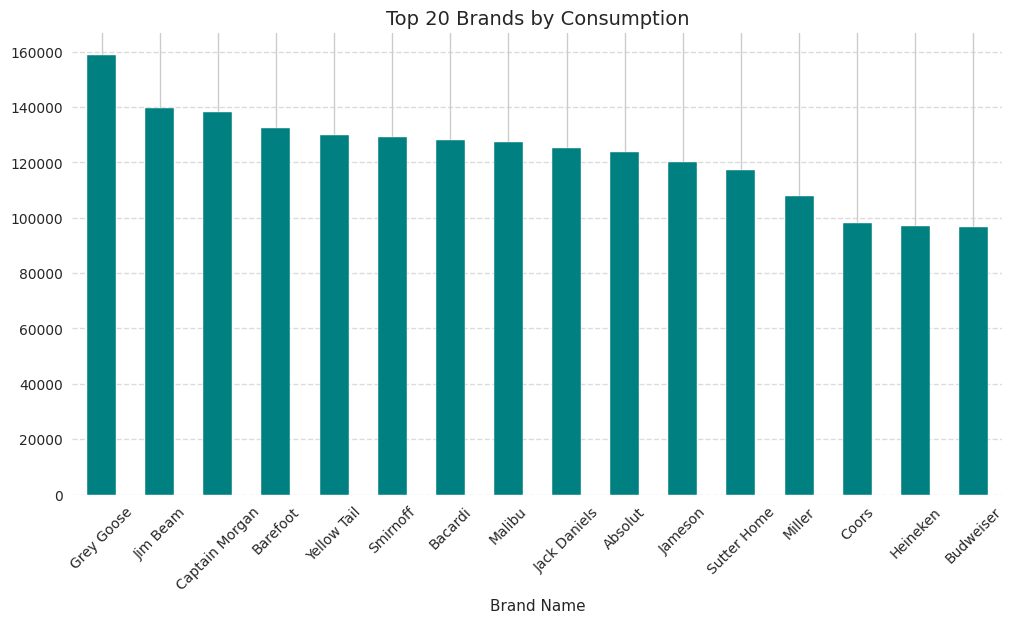

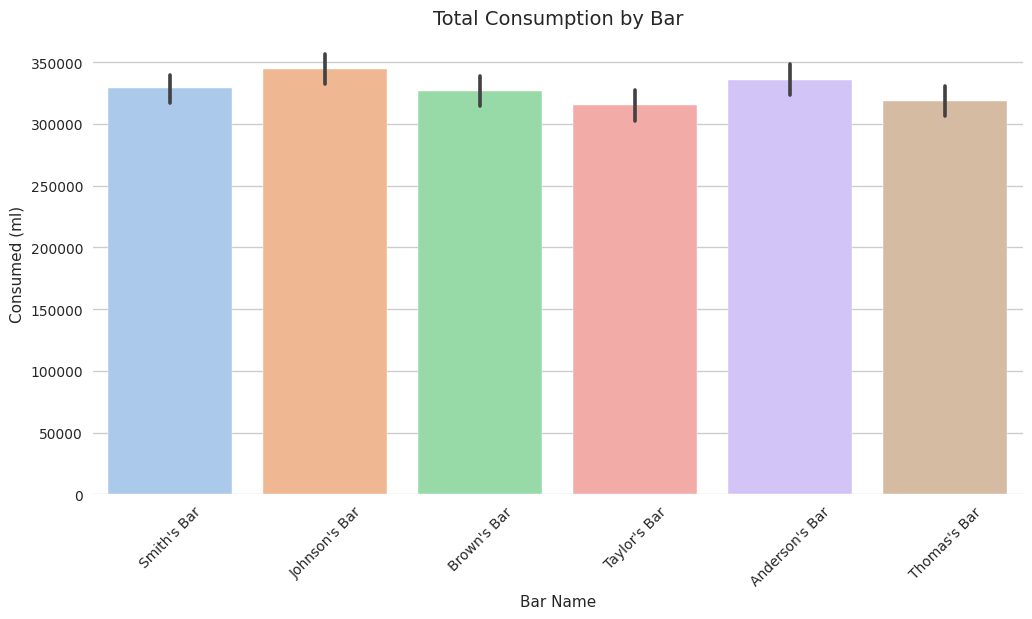


=== Interactive UI ===


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6tpwaxvg/xrlqlu93.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6tpwaxvg/er75leze.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91111', 'data', 'file=/tmp/tmp6tpwaxvg/xrlqlu93.json', 'init=/tmp/tmp6tpwaxvg/er75leze.json', 'output', 'file=/tmp/tmp6tpwaxvg/prophet_modeldmfqn8b7/prophet_model-20250624103459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:34:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:35:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


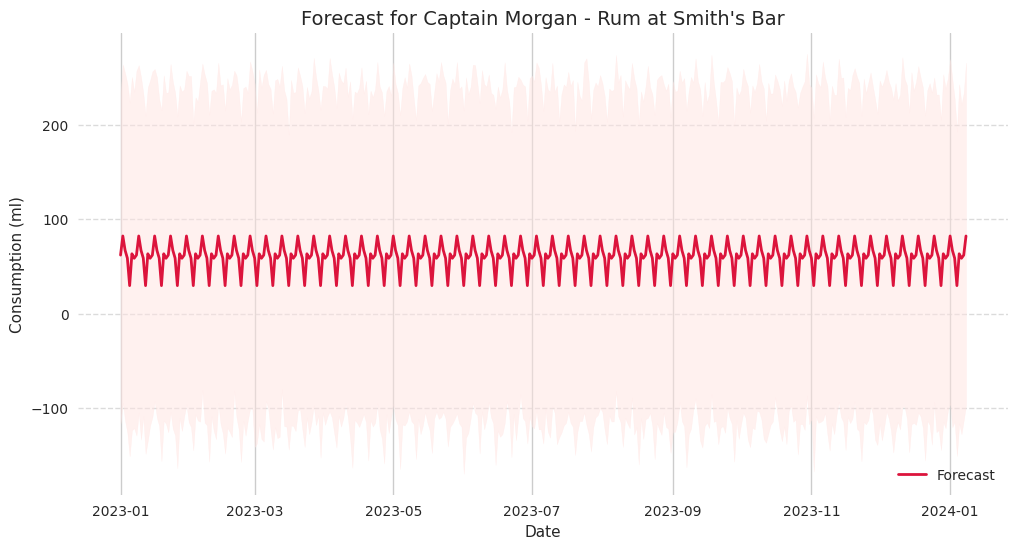


Generating inventory report for Smith's Bar...

Inventory Recommendation for Budweiser - Beer at Smith's Bar:
Average daily consumption: 295.99 ml
Safety stock: 462.76 ml
Reorder point: 1350.72 ml
Par level: 2026.08 ml
Current inventory: 3756.05 ml
Days of supply: 12.7 days

Inventory Recommendation for Coors - Beer at Smith's Bar:
Average daily consumption: 322.84 ml
Safety stock: 486.08 ml
Reorder point: 1454.59 ml
Par level: 2181.88 ml
Current inventory: 2058.18 ml
Days of supply: 6.4 days

Inventory Recommendation for Heineken - Beer at Smith's Bar:
Average daily consumption: 341.58 ml
Safety stock: 469.17 ml
Reorder point: 1493.91 ml
Par level: 2240.86 ml
Current inventory: 391.35 ml
Days of supply: 1.1 days

Inventory Recommendation for Miller - Beer at Smith's Bar:
Average daily consumption: 307.06 ml
Safety stock: 503.76 ml
Reorder point: 1424.94 ml
Par level: 2137.41 ml
Current inventory: 301.48 ml
Days of supply: 1.0 days

Inventory Recommendation for Bacardi - Rum at Smith'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Inventory Recommendation for Captain Morgan - Rum at Smith's Bar:
Average daily consumption: 291.04 ml
Safety stock: 485.10 ml
Reorder point: 1358.23 ml
Par level: 2037.35 ml
Current inventory: 1022.31 ml
Days of supply: 3.5 days


In [1]:
# Install dependencies
!pip install -q prophet ipywidgets

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import warnings
import ipywidgets as widgets
from IPython.display import display
from google.colab import files

# Basic settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_style("whitegrid")

# Main system class
class AlcoholInventorySystem:
    def __init__(self):
        # Upload dataset CSV
        print("Please upload your dataset CSV:")
        uploaded = files.upload()
        file_name = next(iter(uploaded.keys()))
        self.df = self.load_data(file_name)

        # Extract unique dropdown options
        self.bars = self.df['Bar Name'].unique()
        self.alcohol_types = self.df['Alcohol Type'].unique()
        self.brands = self.df['Brand Name'].unique()

        print("\n✅ Data loaded successfully!")

    def load_data(self, path):
        # Load CSV and preprocess data
        df = pd.read_csv(path)
        df['Date Time Served'] = pd.to_datetime(df['Date Time Served'])
        df['Date'] = df['Date Time Served'].dt.date

        # Clean numeric columns
        cols = ['Opening Balance (ml)', 'Purchase (ml)', 'Consumed (ml)', 'Closing Balance (ml)']
        for col in cols:
            df[col] = pd.to_numeric(df[col], errors='coerce')

        # Calculate missing consumption
        df['Consumed (ml)'] = df['Consumed (ml)'].fillna(
            df['Opening Balance (ml)'] + df['Purchase (ml)'] - df['Closing Balance (ml)']
        )

        # Filter invalid rows
        df = df[df['Consumed (ml)'] >= 0]
        return df

    def exploratory_data_analysis(self):
        # Plot EDA graphs
        print("\n=== EDA ===")

        # By Alcohol Type
        plt.figure(figsize=(12,6))
        sns.barplot(x='Alcohol Type', y='Consumed (ml)', data=self.df, estimator=sum, palette='muted')
        plt.title('Total Consumption by Alcohol Type', fontsize=14)
        plt.xticks(rotation=45)
        plt.show()

        # Top 20 Brands
        top_brands = self.df.groupby('Brand Name')['Consumed (ml)'].sum().sort_values(ascending=False).head(20)
        plt.figure(figsize=(12,6))
        top_brands.plot(kind='bar', color='teal')
        plt.title('Top 20 Brands by Consumption', fontsize=14)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        # By Bar Name
        plt.figure(figsize=(12,6))
        sns.barplot(x='Bar Name', y='Consumed (ml)', data=self.df, estimator=sum, palette='pastel')
        plt.title('Total Consumption by Bar', fontsize=14)
        plt.xticks(rotation=45)
        plt.show()

    def forecast_demand(self, bar, alcohol, brand, days=7):
        # Filter data
        df_product = self.df[(self.df['Bar Name']==bar) &
                             (self.df['Alcohol Type']==alcohol) &
                             (self.df['Brand Name']==brand)]

        if df_product.empty:
            print("No data for selection.")
            return None

        # Prepare daily series
        daily = df_product.groupby('Date')['Consumed (ml)'].sum()
        idx = pd.date_range(start=daily.index.min(), end=daily.index.max())
        daily = daily.reindex(idx, fill_value=0).reset_index()
        daily.columns = ['ds','y']

        # Fit Prophet model
        model = Prophet(
            growth='flat',
            daily_seasonality=True,
            weekly_seasonality=True,
            yearly_seasonality=False,
            seasonality_mode='multiplicative',
            changepoint_prior_scale=0.5
        )
        model.fit(daily)

        # Forecast next N days
        future = model.make_future_dataframe(periods=days)
        forecast = model.predict(future)

        # Plot forecast only (no actual)
        plt.figure(figsize=(12,6))
        plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='crimson', linewidth=2)
        plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
                         color='mistyrose', alpha=0.5)
        plt.legend(frameon=False)
        plt.title(f"Forecast for {brand} - {alcohol} at {bar}", fontsize=14)
        plt.xlabel('Date')
        plt.ylabel('Consumption (ml)')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        return forecast.tail(days)

    def calculate_inventory_recommendation(self, bar, alcohol, brand, lead_time=3):
        # Filter data
        df_product = self.df[(self.df['Bar Name']==bar) &
                             (self.df['Alcohol Type']==alcohol) &
                             (self.df['Brand Name']==brand)]

        daily = df_product.groupby('Date')['Consumed (ml)'].sum()

        if len(daily) < 7:
            print("Insufficient data.")
            return None

        # Calculate stats
        avg_daily = daily.mean()
        std_daily = daily.std()
        z = 1.645
        safety_stock = z * std_daily * np.sqrt(lead_time)
        reorder_point = avg_daily * lead_time + safety_stock
        par_level = reorder_point * 1.5
        current_inventory = df_product.iloc[-1]['Closing Balance (ml)']
        days_supply = current_inventory / avg_daily

        # Print summary
        print(f"\nInventory Recommendation for {brand} - {alcohol} at {bar}:")
        print(f"Average daily consumption: {avg_daily:.2f} ml")
        print(f"Safety stock: {safety_stock:.2f} ml")
        print(f"Reorder point: {reorder_point:.2f} ml")
        print(f"Par level: {par_level:.2f} ml")
        print(f"Current inventory: {current_inventory:.2f} ml")
        print(f"Days of supply: {days_supply:.1f} days")

        return {
            'Bar': bar,
            'Alcohol Type': alcohol,
            'Brand': brand,
            'Avg Daily': avg_daily,
            'Safety Stock': safety_stock,
            'Reorder Point': reorder_point,
            'Par Level': par_level,
            'Current Inventory': current_inventory,
            'Days Supply': days_supply
        }

    def generate_report(self, bar):
        # Generate full report for bar
        print(f"\nGenerating inventory report for {bar}...")
        report = []
        grouped = self.df[self.df['Bar Name']==bar].groupby(['Alcohol Type','Brand Name']).size().reset_index()

        for _, row in grouped.iterrows():
            rec = self.calculate_inventory_recommendation(bar, row['Alcohol Type'], row['Brand Name'])
            if rec:
                report.append(rec)

        df_report = pd.DataFrame(report)
        filename = f"Inventory_Recommendations_{bar.replace(' ','_')}.csv"
        df_report.to_csv(filename, index=False)
        print(f"✅ Report saved: {filename}")
        files.download(filename)

    def run_ui(self):
        # Simple UI: Dropdowns + buttons
        print("\n=== Interactive UI ===")
        bar_dd = widgets.Dropdown(options=self.bars, description='Bar:')
        alcohol_dd = widgets.Dropdown(options=self.alcohol_types, description='Alcohol Type:')
        brand_dd = widgets.Dropdown(options=self.brands, description='Brand:')

        btn_forecast = widgets.Button(description="Forecast Demand")
        btn_recommend = widgets.Button(description="Inventory Recommendation")
        btn_report = widgets.Button(description="Download Bar Report")

        # Event handlers
        def forecast_click(b):
            self.forecast_demand(bar_dd.value, alcohol_dd.value, brand_dd.value)

        def recommend_click(b):
            self.calculate_inventory_recommendation(bar_dd.value, alcohol_dd.value, brand_dd.value)

        def report_click(b):
            self.generate_report(bar_dd.value)

        btn_forecast.on_click(forecast_click)
        btn_recommend.on_click(recommend_click)
        btn_report.on_click(report_click)

        display(widgets.VBox([
            bar_dd, alcohol_dd, brand_dd,
            btn_forecast, btn_recommend, btn_report
        ]))

# Run system
system = AlcoholInventorySystem()
system.exploratory_data_analysis()
system.run_ui()
